In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

### Sử dụng numpy, pandas và scipy

Vẽ phân bố các điểm dữ liệu

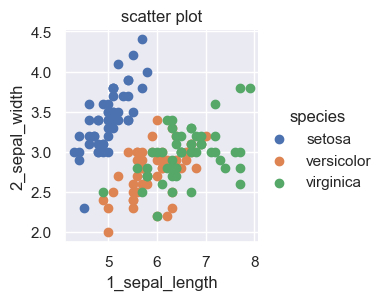

In [2]:
# load the data set
iris = sns.load_dataset('iris')
iris = iris.rename(index=str, columns={'sepal_length':'1_sepal_length', 'sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_length':'4_petal_length'})

# plot the scatter of sepal length and sepal width
sns.FacetGrid(iris, hue='species').map(plt.scatter, '1_sepal_length', '2_sepal_width', ).add_legend()
plt.title('scatter plot')
df1 = iris[['1_sepal_length', '2_sepal_width', 'species']]

sử dụng numpy xây dựng hàm phân loại 

In [3]:
def predict_NB_gaussian_class(X, mu_list, std_list, pi_list):
    # returns the class for which the GaussianNB 
    # objective function has max value
    scores_list = []
    classes = len(mu_list)

    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0]) \
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1]) \
                * pi_list[p])
        scores_list.append(score)
    
    return np.argmax(scores_list)

In [7]:
def predict_Bayes_class(X, mu_list, sigma_list):
    # return the predicted class from an optimal bayes classifier
    # distribution must be known
    scores_list = []
    classes = len(mu_list)

    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list, cov=sigma_list)
        scores_list.append(score)

    return np.argmax(scores_list)

in và vẽ kết quả

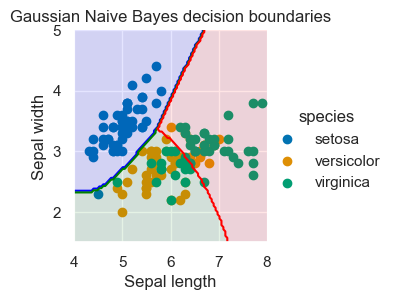

In [19]:
# estimate the parameters
mu_list = np.split(df1.groupby('species').mean().values, [1,2])
std_list = np.split(df1.groupby('species').std().values, [1,2], axis=0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)

g = sns.FacetGrid(iris, hue='species', palette='colorblind').map(plt.scatter, '1_sepal_length', '2_sepal_width',).add_legend()
my_ax = g.ax

# compute the predicted class function for each value on the grid
zz = np.array([predict_NB_gaussian_class(np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y))])

# reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

# plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# add axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()


In [22]:
[np.array([xx,yy]).reshape(-1,1) for xx,yy in zip(np.ravel(X), np.ravel(Y))]

[array([[4. ],
        [1.5]]),
 array([[4.04040404],
        [1.5       ]]),
 array([[4.08080808],
        [1.5       ]]),
 array([[4.12121212],
        [1.5       ]]),
 array([[4.16161616],
        [1.5       ]]),
 array([[4.2020202],
        [1.5      ]]),
 array([[4.24242424],
        [1.5       ]]),
 array([[4.28282828],
        [1.5       ]]),
 array([[4.32323232],
        [1.5       ]]),
 array([[4.36363636],
        [1.5       ]]),
 array([[4.4040404],
        [1.5      ]]),
 array([[4.44444444],
        [1.5       ]]),
 array([[4.48484848],
        [1.5       ]]),
 array([[4.52525253],
        [1.5       ]]),
 array([[4.56565657],
        [1.5       ]]),
 array([[4.60606061],
        [1.5       ]]),
 array([[4.64646465],
        [1.5       ]]),
 array([[4.68686869],
        [1.5       ]]),
 array([[4.72727273],
        [1.5       ]]),
 array([[4.76767677],
        [1.5       ]]),
 array([[4.80808081],
        [1.5       ]]),
 array([[4.84848485],
        [1.5       ]]),
 array

In [5]:
mu_list

[array([[5.006, 3.428]]), array([[5.936, 2.77 ]]), array([[6.588, 2.974]])]

In [16]:
np.split(df1.groupby('species').mean().values, [1,2])

[array([[5.006, 3.428]]), array([[5.936, 2.77 ]]), array([[6.588, 2.974]])]

### Sử dụng scikit-learning

In [18]:
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as colors

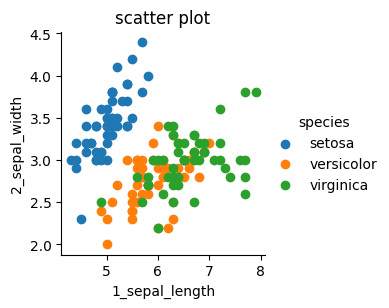

In [8]:
# load the data set
iris = sns.load_dataset('iris')
iris = iris.rename(index=str, columns={'sepal_length':'1_sepal_length', 'sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_length':'4_petal_length'})

# plot the scatter of sepal length and sepal width
sns.FacetGrid(iris, hue='species').map(plt.scatter, '1_sepal_length', '2_sepal_width', ).add_legend()
plt.title('scatter plot')
df1 = iris[['1_sepal_length', '2_sepal_width', 'species']]

In [11]:
# setup X and Y data
X_data = df1.iloc[:,0:2]
Y_labels = df1.iloc[:,2].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()

In [13]:
# fit model
model_sk = GaussianNB(priors=None)
model_sk.fit(X_data, Y_labels)

GaussianNB()

In [16]:
# our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

c:\Users\Admin\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitte

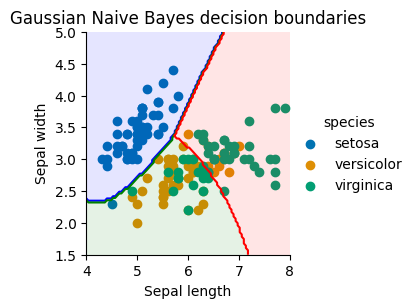

In [19]:
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)

g = sns.FacetGrid(iris, hue='species', palette='colorblind').map(plt.scatter, '1_sepal_length', '2_sepal_width',).add_legend()
my_ax = g.ax

# compute the predicted class function for each value on the grid
zz = np.array([model_sk.predict([[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y))])

# reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

# plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# add axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()